In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
import matplotlib as plt
from sklearn.naive_bayes import GaussianNB
from libs.ds_charts import plot_evaluation_results, bar_chart
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.metrics import accuracy_score, f1_score
from pandas import concat, DataFrame
import libs.ds_charts as ds



### TRAIN AND TEST

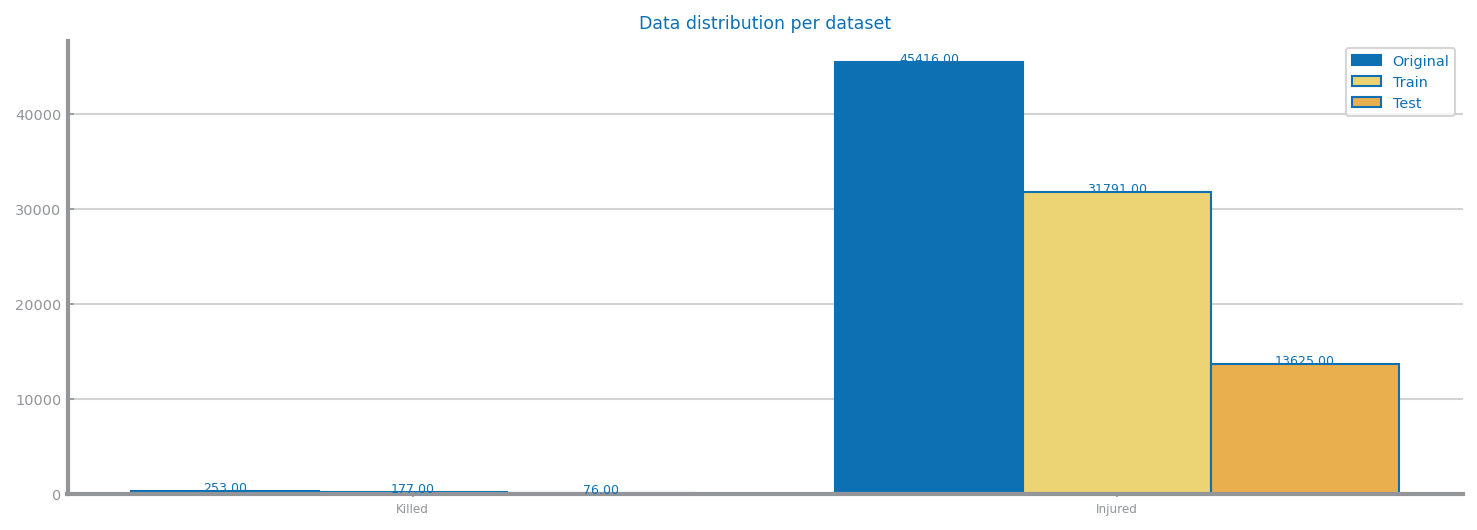

In [23]:
import numpy as np
from pandas import read_csv, concat, unique, DataFrame
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

file_tag = 'nyc_collisions_dummified'
data: DataFrame = read_csv('data/nyc_collisions_dummified.csv')
target = 'PERSON_INJURY'
positive = 'Killed'
negative = 'Injured'
values = {'Original': [len(data[data[target] == positive]), len(data[data[target] == negative])]}

y: np.ndarray = data.pop(target).values
X: np.ndarray = data.values
labels: np.ndarray = unique(y)
labels.sort()

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

train = concat([DataFrame(trnX, columns=data.columns), DataFrame(trnY,columns=[target])], axis=1)
train.to_csv(f'data/{file_tag}_train.csv', index=False)

test = concat([DataFrame(tstX, columns=data.columns), DataFrame(tstY,columns=[target])], axis=1)
test.to_csv(f'data/{file_tag}_test.csv', index=False)
values['Train'] = [len(np.delete(trnY, np.argwhere(trnY==negative))), len(np.delete(trnY, np.argwhere(trnY==positive)))]
values['Test'] = [len(np.delete(tstY, np.argwhere(tstY==negative))), len(np.delete(tstY, np.argwhere(tstY==positive)))]

plt.figure(figsize=(12,4))
ds.multiple_bar_chart([positive, negative], values, title='Data distribution per dataset')
plt.show()

### NAIVE BAYES

In [5]:
### FILES (treino devia ser smote!)
file_tag_zscore = 'nyc_collisions_scaled_zscore'
filename_zscore = 'data/nyc_collisions_scaled_zscore'

file_tag_minmax = 'nyc_collisions_scaled_minmax'
filename_minmax = 'data/nyc_collisions_scaled_minmax'

target = 'ALARM'

In [6]:
#PREPARE TRAIN AND TEST SZCORE
# smote seems the best 
#train_zscore: DataFrame = read_csv(f'{filename_zscore}_train.csv')
#test_zscore: DataFrame = read_csv(f'{filename_zscore}_test.csv')
train_zscore: DataFrame = read_csv(f'data/report/air_quality_dummified_v1_train.csv')
test_zscore: DataFrame = read_csv(f'data/report/air_quality_dummified_v1_test.csv')

print(len(train_zscore.columns) == len(test_zscore.columns))

#train_zscore.drop(['CRASH_DATE','CRASH_TIME','PERSON_ID'], axis=1, inplace=True)
#test_zscore.drop(['CRASH_DATE','CRASH_TIME'],axis=1, inplace=True) #,'PERSON_ID'

print(len(train_zscore.columns) == len(test_zscore.columns))

trnY_zscore: np.ndarray = train_zscore.pop(target).values
trnX_zscore: np.ndarray = train_zscore.values
labels = unique(trnY_zscore)
labels.sort()

tstY_zscore: np.ndarray = test_zscore.pop(target).values
tstX_zscore: np.ndarray = test_zscore.values

clf = BernoulliNB()
clf.fit(trnX_zscore, trnY_zscore)
prd_trn = clf.predict(trnX_zscore)
prd_tst = clf.predict(tstX_zscore)
print(f1_score(tstY_zscore, prd_tst, pos_label='Danger'))
plot_evaluation_results(labels, trnY_zscore, prd_trn, tstY_zscore, prd_tst)
#savefig(f'lab4_images/dataset_1/{file_tag_zscore}_nb_best_dummified_finalversion.png')
show()

True
True


ValueError: could not convert string to float: 's'

### KNN 

In [25]:
from numpy import ndarray
from pandas import DataFrame, read_csv, unique
from matplotlib.pyplot import figure, savefig, show
from sklearn.neighbors import KNeighborsClassifier
from libs.ds_charts import plot_evaluation_results, multiple_line_chart
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

clf = knn = KNeighborsClassifier(n_neighbors=1, metric='manhattan')
clf.fit(trnX_zscore, trnY_zscore)
prd_trn = clf.predict(trnX_zscore)
prd_tst = clf.predict(tstX_zscore)

print(f1_score(tstY_zscore, prd_tst, pos_label='Killed'))

0.46017699115044247


True
True
0.6960784313725491


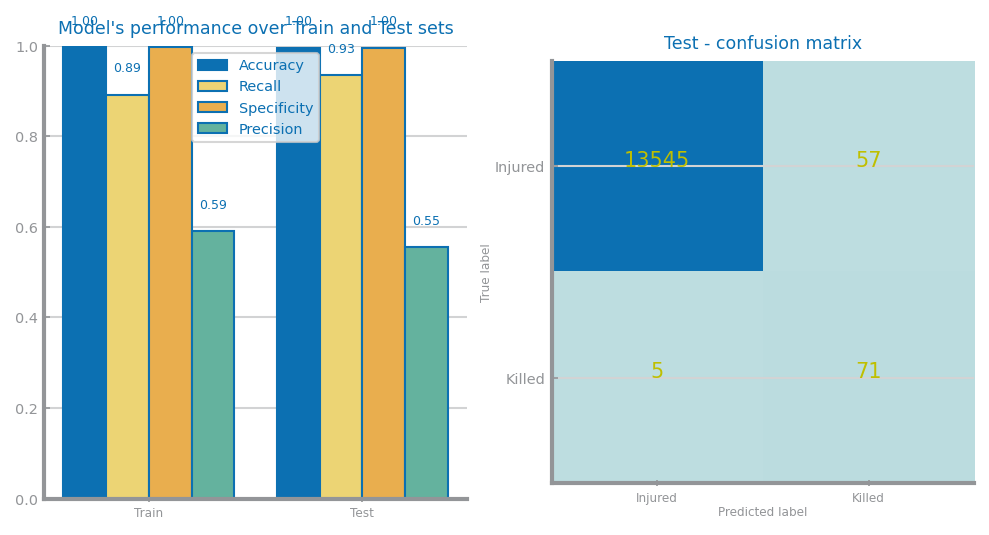

In [7]:
#PREPARE TRAIN AND TEST MINMAX
train_minmax: DataFrame = read_csv(f'{filename_minmax}_train.csv')
test_minmax: DataFrame = read_csv(f'{filename_minmax}_test.csv')

print(len(train_minmax.columns) == len(test_minmax.columns))

#train_zscore.drop(['CRASH_DATE','CRASH_TIME','PERSON_ID'], axis=1, inplace=True)
#test_minmax.drop(['CRASH_DATE','CRASH_TIME'],axis=1, inplace=True) #,'PERSON_ID'

print(len(train_minmax.columns) == len(test_minmax.columns))

trnY_minmax: np.ndarray = train_minmax.pop(target).values
trnX_minmax: np.ndarray = train_minmax.values
labels = unique(trnY_minmax)
labels.sort()

tstY_minmax: np.ndarray = test_minmax.pop(target).values
tstX_minmax: np.ndarray = test_minmax.values

clf = MultinomialNB()
clf.fit(trnX_minmax, trnY_minmax)
prd_trn = clf.predict(trnX_minmax)
prd_tst = clf.predict(tstX_minmax)

print(f1_score(tstY_minmax, prd_tst, pos_label='Killed'))
plot_evaluation_results(labels, trnY_minmax, prd_trn, tstY_minmax, prd_tst)
savefig(f'lab4_images/dataset_1/{file_tag_minmax}_nb_best_minmax.png')
show()


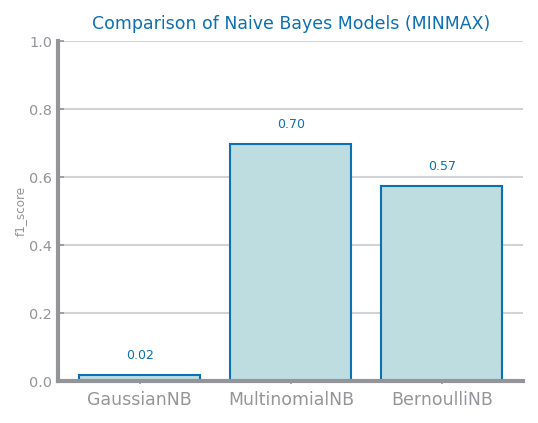

In [26]:
#MINMAX STUDY
from libs.ds_charts import bar_chart
estimators = {'GaussianNB': GaussianNB(),
              'MultinomialNB': MultinomialNB(),
              'BernoulliNB': BernoulliNB()
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX_minmax, trnY_minmax)
    prdY = estimators[clf].predict(tstX_minmax)
    yvalues.append(f1_score(tstY_minmax, prdY, pos_label='Killed'))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (MINMAX)', ylabel='f1_score', percentage=True)
savefig(f'lab4_images/dataset_1/minmax_nb_study_minmax.png')
show()

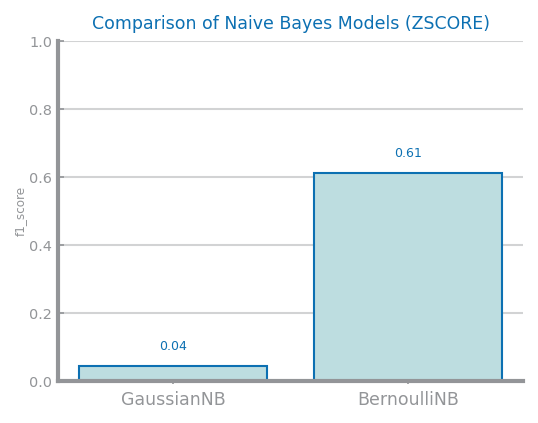

In [27]:
#ZSCORE STUDY
from libs.ds_charts import bar_chart
estimators = {'GaussianNB': GaussianNB(),
              'BernoulliNB': BernoulliNB()
              #'CategoricalNB': CategoricalNB
              }

xvalues = []
yvalues = []
for clf in estimators:
    xvalues.append(clf)
    estimators[clf].fit(trnX_zscore, trnY_zscore)
    prdY = estimators[clf].predict(tstX_zscore)
    yvalues.append(f1_score(tstY_zscore, prdY, pos_label='Killed'))

figure()
bar_chart(xvalues, yvalues, title='Comparison of Naive Bayes Models (ZSCORE)', ylabel='f1_score', percentage=True)
savefig(f'lab4_images/dataset_1/zscore_nb_study_zscore.png')
show()